In [1]:
import os


os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [3]:
import lightgbm as lgb  # 导入整个 lightgbm 库

import xgboost as xgb
# 此处所引入的包大部分为下文机器学习算法
import pandas as pd
from numpy import *
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
# import xgboost as xgb

from sklearn.metrics import accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor

import warnings

warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split


决策树回归:
训练集平均绝对百分比误差:0.000
测试集平均绝对百分比误差:15.056
平均绝对误差: 26470.70091324201
r2_score 0.6797460239212758


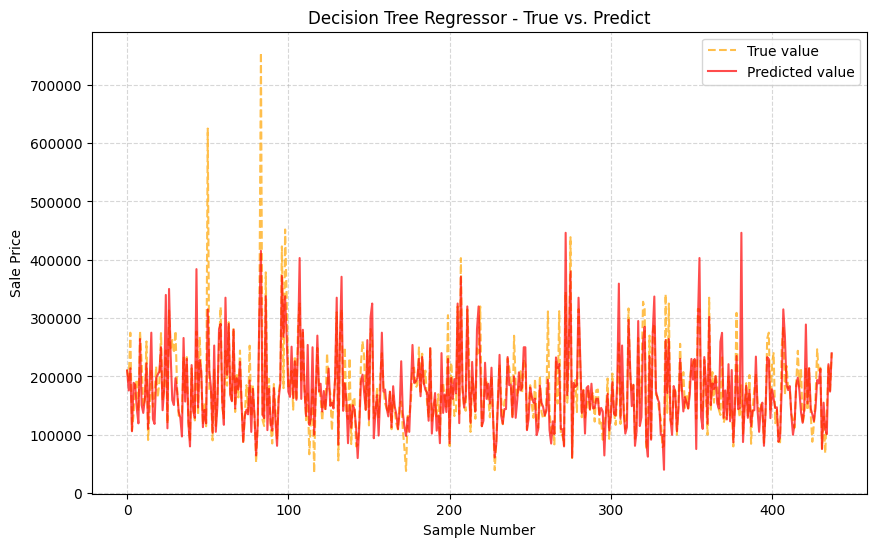


随机森林回归:
训练集平均绝对百分比误差:3.729
测试集平均绝对百分比误差:9.697
平均绝对误差: 17748.21392694064
r2_score 0.8413617743065108


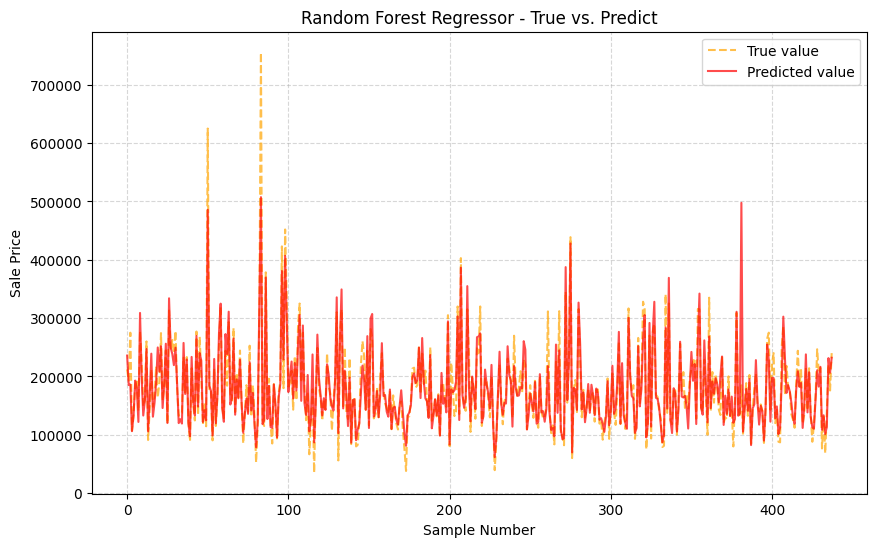

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001663 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3354
[LightGBM] [Info] Number of data points in the train set: 1022, number of used features: 185
[LightGBM] [Info] Start training from score 181670.873777

LGBM回归:
训练集平均绝对百分比误差:2.605
测试集平均绝对百分比误差:9.008
平均绝对误差: 16387.722059327447
r2_score 0.8516765304026097


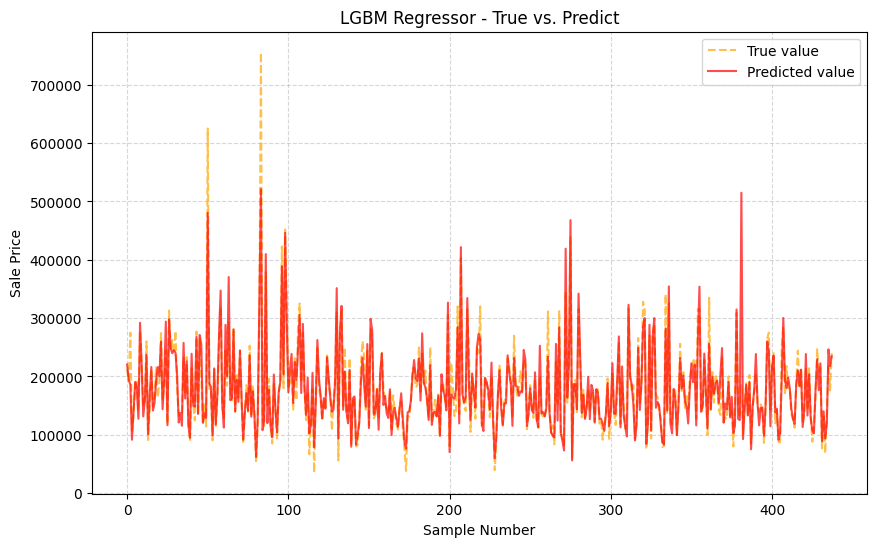


Adaboost回归:
训练集平均绝对百分比误差:11.846
测试集平均绝对百分比误差:12.476
平均绝对误差: 23103.15095517458
r2_score 0.7659513040181836


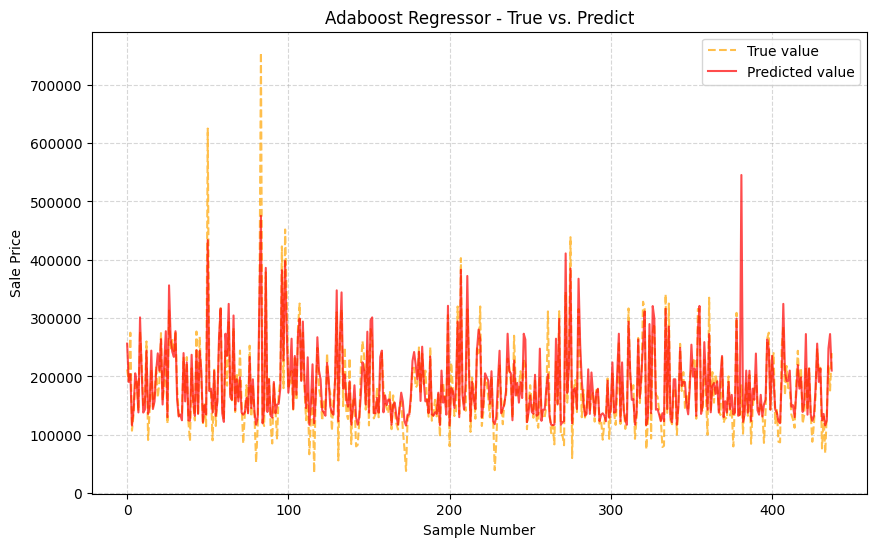

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# 自定义MAPE函数
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 加载数据集
train_data_path = 'kaggle_house_pred_train.csv'
test_data_path = 'kaggle_house_pred_test.csv'
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

# 分离特征和目标变量
X = train_data.drop('SalePrice', axis=1)  # 特征
Y = train_data['SalePrice']               # 目标变量

# 选择数值和分类列
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# 创建预处理步骤
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

# 预处理列并构建column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# 现在将预处理器应用于X和X_test
X_processed = preprocessor.fit_transform(X)
X_test_processed = preprocessor.transform(test_data)

# 拆分数据集
tr_x, te_x, tr_y, te_y = train_test_split(X_processed, Y, test_size=0.3, random_state=5)


def plot_results(true_y, pred_y, title):
    plt.figure(figsize=(10, 6))
    plt.plot(range(true_y.shape[0]), true_y, color='orange', linestyle='--', label='True value', alpha=0.7)
    plt.plot(range(pred_y.shape[0]), pred_y, color='red', linestyle='-', label='Predicted value', alpha=0.7)
    plt.title(title)
    plt.xlabel('Sample Number')
    plt.ylabel('Sale Price')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


# 决策树回归
tree = DecisionTreeRegressor(max_depth=50, random_state=0)
tree.fit(tr_x, tr_y)
y_pred = tree.predict(te_x)
print("\n决策树回归:")
print("训练集平均绝对百分比误差:{:.3f}".format(mape(tree.predict(tr_x), tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(tree.predict(te_x), te_y)))
print("平均绝对误差:", mean_absolute_error(te_y, y_pred))
print("r2_score", r2_score(te_y, y_pred))
plot_results(te_y, y_pred, 'Decision Tree Regressor - True vs. Predict')

# 随机森林回归
rf = RandomForestRegressor(random_state=5)
rf.fit(tr_x, tr_y)
y_pred = rf.predict(te_x)
print("\n随机森林回归:")
print("训练集平均绝对百分比误差:{:.3f}".format(mape(rf.predict(tr_x), tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(rf.predict(te_x), te_y)))
print("平均绝对误差:", mean_absolute_error(te_y, y_pred))
print("r2_score", r2_score(te_y, y_pred))
plot_results(te_y, y_pred, 'Random Forest Regressor - True vs. Predict')

# LGBM回归
lgb_model = lgb.LGBMRegressor(random_state=5)
lgb_model.fit(tr_x, tr_y)
y_pred = lgb_model.predict(te_x)
print("\nLGBM回归:")
print("训练集平均绝对百分比误差:{:.3f}".format(mape(lgb_model.predict(tr_x), tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(lgb_model.predict(te_x), te_y)))
print("平均绝对误差:", mean_absolute_error(te_y, y_pred))
print("r2_score", r2_score(te_y, y_pred))
plot_results(te_y, y_pred, 'LGBM Regressor - True vs. Predict')

# Adaboost回归
ada_model = AdaBoostRegressor(n_estimators=100, random_state=5)
ada_model.fit(tr_x, tr_y)
y_pred = ada_model.predict(te_x)
print("\nAdaboost回归:")
print("训练集平均绝对百分比误差:{:.3f}".format(mape(ada_model.predict(tr_x), tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(ada_model.predict(te_x), te_y)))
print("平均绝对误差:", mean_absolute_error(te_y, y_pred))
print("r2_score", r2_score(te_y, y_pred))
plot_results(te_y, y_pred, 'Adaboost Regressor - True vs. Predict')
